# YOLO Railroad Detection


### IMPORTANT: Notebook Setting

Make sure to change your runtime to **T4** for improved training times


In [ ]:
# Check if GPU is available
!nvidia-smi


import torch

# Check CUDA availability before accessing device information
if torch.cuda.is_available():
    print("\nCUDA available:", torch.cuda.is_available())
    print("Current device:", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Running on CPU.")

Mon Mar 10 20:17:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Imports

**Roboflow** was used to label the images and create the dataset with a train/test/validate split.

The images were then converted to 640x640 .jpg format.

No augmentation was used, but the images were preprocessed to enhance contrast.

**Ultralytics** was used to train the YOLO model.


In [ ]:
!pip install ultralytics

In [ ]:
import os
import glob
from IPython.display import Image, display

from ultralytics import YOLO

## Train

I chose YOLO v12 Small (`12s`) as my model for this task for its great balance between traintime and performance, especially when training it locally.
Since we are taking advantage of Google T4 GPU runtime in this notebook, we could try to move to a bigger version of the model, such as v12 Medium (`12m`).

Training parameters:

- `epochs=50`: More than enough since early stopping is used
- `imgsz=640`: Standard YOLO input size (640×640 pixels)

- `batch=16`: Good balance of speed and memory usage

- `patience=10`: Early stopping patience of 10 epochs (good balance of speed and accuracy)

- `augment=True`: Enable automatic data augmentation (random flips, rotations, color changes) to improve how the model generalizes on new data

- `lr0=0.0005`: Initial learning rate to 0.0005, a moderately conservative value for stable training

- `momentum=0.937`: Momentum in optimizer, helping to smooth updates

- `weight_decay=0.001`: Apply L2 regularization of 0.001

- `iou=0.1`: Penalize boxes that overlap by more than 10% and drop the one wtih the lower IoU (Intersection over Union)


In [ ]:
model = YOLO("yolo12s.pt")

# Train the model
results = model.train(
    name="sleeper_clip_detector_improved",
    data="Rail-Tracks-6/data.yaml",
    save=True,
    verbose=False,
    augment=True,
    epochs=50,
    imgsz=640,
    batch=16,
    patience=10,
    lr0=0.0005,
    momentum=0.937,
    weight_decay=0.001,
    iou=0.1,
)

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo12s.pt, data=/content/Rail-Tracks-6/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=sleeper_clip_detector_improved2, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

train: Scanning /content/Rail-Tracks-6/train/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1762.76it/s]

train: New cache created: /content/Rail-Tracks-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 29, len(boxes) = 702. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Rail-Tracks-6/valid/labels... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<00:00, 721.82it/s]

val: New cache created: /content/Rail-Tracks-6/valid/labels.cache


Plotting labels to runs/detect/sleeper_clip_detector_improved2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.001), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/sleeper_clip_detector_improved2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      6.07G      1.974      4.031      1.636        362        640: 100%|██████████| 3/3 [00:03<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.27s/it]

                   all         15        220      0.122      0.233      0.101     0.0613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.95G      1.817      3.882      1.592        267        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         15        220      0.229      0.131      0.146     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.94G      1.785      3.923      1.565        328        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         15        220      0.261      0.147      0.192      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.96G      1.545      2.568      1.298        243        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         15        220       0.69      0.932      0.852      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         6G      1.321      1.383      1.106        250        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         15        220      0.846      0.957      0.955       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.02G      1.266       1.01      1.073        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         15        220      0.829      0.972      0.926      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.03G      1.293     0.9604      1.064        406        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         15        220      0.978      0.972      0.993      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.04G      1.269     0.8927      1.083        319        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         15        220      0.981      0.989      0.992      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.03G      1.239     0.8536      1.025        416        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         15        220      0.939      0.952       0.98      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.01G       1.25     0.8802      1.072        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         15        220      0.953       0.95      0.974      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.02G      1.189     0.7923      1.053        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         15        220      0.971          1      0.994      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.98G      1.197     0.7915       1.07        306        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         15        220      0.978      0.985      0.995      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.05G      1.259      0.837      1.108        270        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         15        220       0.98          1      0.995      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.01G      1.236      0.731      1.067        354        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         15        220      0.998          1      0.995       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.04G      1.182     0.7126      1.048        352        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         15        220      0.494      0.811      0.663      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.02G      1.201     0.7275      1.089        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.75it/s]

                   all         15        220      0.261      0.159      0.158      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.06G      1.159     0.6939      1.053        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         15        220      0.468      0.574      0.402      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         6G      1.189     0.6769      1.056        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         15        220      0.502      0.987        0.7      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.03G      1.236     0.7431      1.085        344        640: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         15        220        0.8      0.972      0.975       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.04G      1.184     0.6905      1.067        253        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         15        220      0.894      0.979      0.981      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.02G      1.188     0.6692      1.048        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         15        220      0.908      0.992      0.992      0.694
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 11, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



21 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/sleeper_clip_detector_improved2/weights/last.pt, 18.9MB
Optimizer stripped from runs/detect/sleeper_clip_detector_improved2/weights/best.pt, 18.9MB

Validating runs/detect/sleeper_clip_detector_improved2/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                   all         15        220      0.959      0.986      0.994      0.678
Speed: 0.2ms preprocess, 30.7ms inference, 0.0ms loss, 51.9ms postprocess per image
Results saved to runs/detect/sleeper_clip_detector_improved2


## Evaluate

If you want to check the performance plots in detail, they can be accessed in the directory indicated at the bottom of the output below.


In [ ]:
metrics = model.val()

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs


val: Scanning /content/Rail-Tracks-6/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]


                   all         15        220      0.958      0.986      0.994      0.676
Speed: 0.2ms preprocess, 40.3ms inference, 0.0ms loss, 47.7ms postprocess per image
Results saved to runs/detect/sleeper_clip_detector_improved22


## Visualize



0: 640x640 16 Clipss, 4 Sleeperss, 14.4ms
1: 640x640 8 Clipss, 2 Sleeperss, 14.4ms
2: 640x640 16 Clipss, 4 Sleeperss, 14.4ms
3: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
4: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
5: 640x640 8 Clipss, 2 Sleeperss, 14.4ms
6: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
7: 640x640 8 Clipss, 2 Sleeperss, 14.4ms
8: 640x640 16 Clipss, 4 Sleeperss, 14.4ms
9: 640x640 8 Clipss, 3 Sleeperss, 14.4ms
10: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
11: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
12: 640x640 16 Clipss, 4 Sleeperss, 14.4ms
13: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
14: 640x640 8 Clipss, 2 Sleeperss, 14.4ms
15: 640x640 7 Clipss, 2 Sleeperss, 14.4ms
16: 640x640 16 Clipss, 4 Sleeperss, 14.4ms
17: 640x640 12 Clipss, 4 Sleeperss, 14.4ms
18: 640x640 12 Clipss, 3 Sleeperss, 14.4ms
19: 640x640 8 Clipss, 3 Sleeperss, 14.4ms
Speed: 6.4ms preprocess, 14.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6

Image: imageyolo20_j

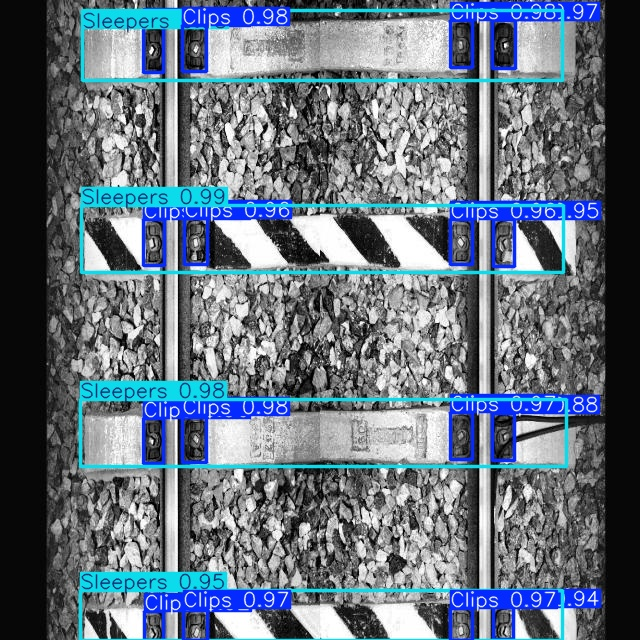


Image: imageyolo2_jpg.rf.08a49d62ee645c8cca7279a92485af87.jpg
Clips: 8, Sleepers: 2
Correct ratio (4:1): YES


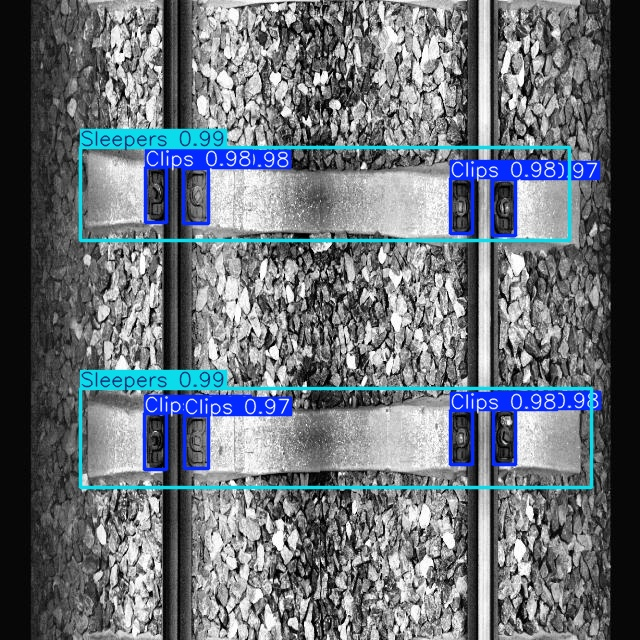


Image: imageyolo24_jpg.rf.ef69416f6af1441af45d8d46e73637d2.jpg
Clips: 16, Sleepers: 4
Correct ratio (4:1): YES


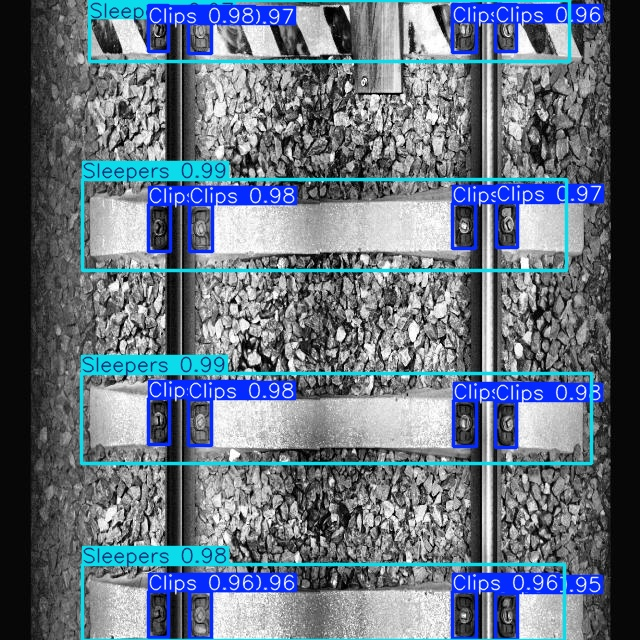


Image: imageyolo63_jpg.rf.364cf6ceb2eb057fb75cced455a0dd34.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


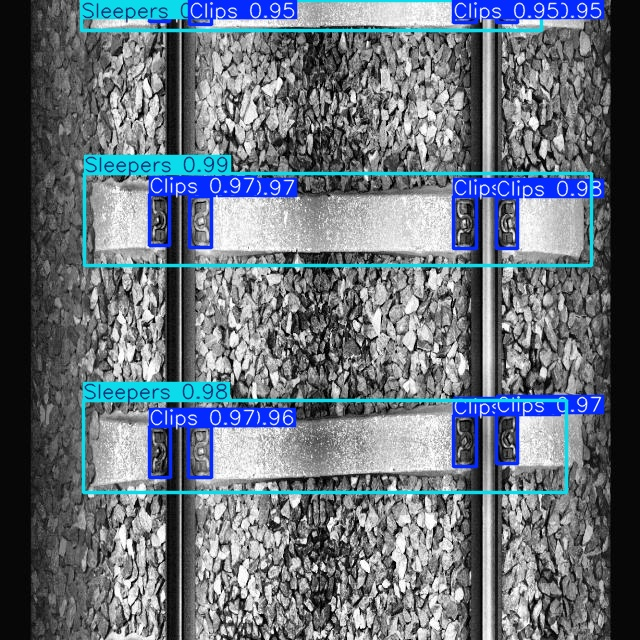


Image: imageyolo29_jpg.rf.ca4838872a6559401d3f4e455c435042.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


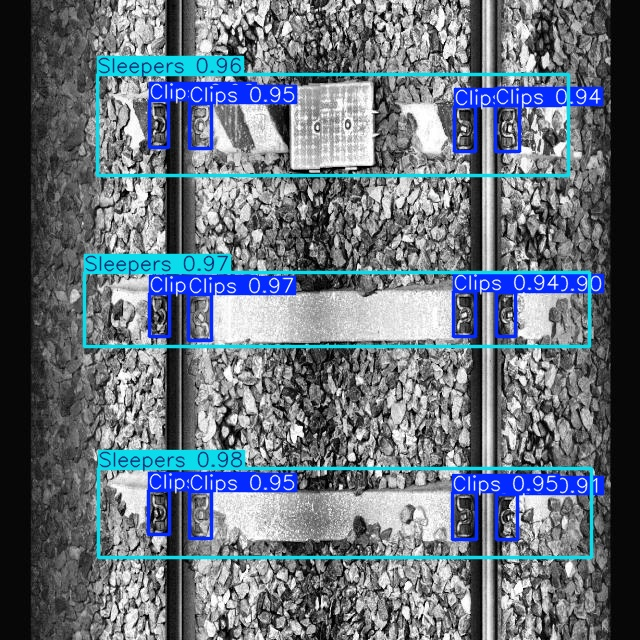


Image: imageyolo30_jpg.rf.4258deccbf9d29c8c205156f839d65fa.jpg
Clips: 8, Sleepers: 2
Correct ratio (4:1): YES


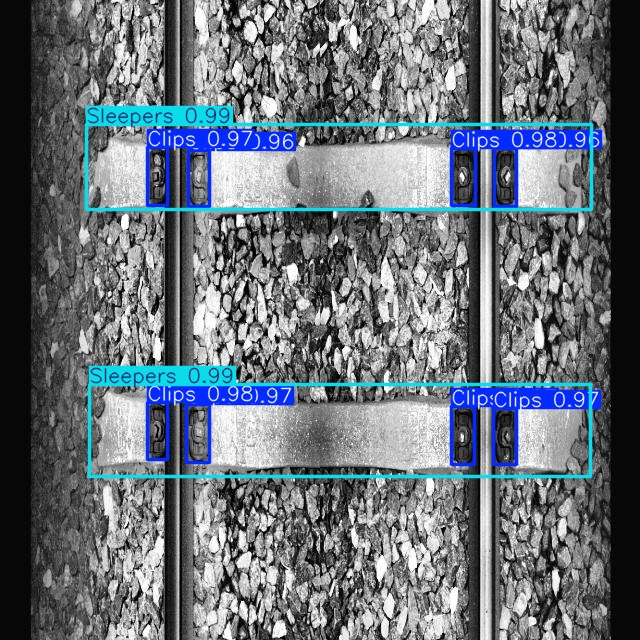


Image: imageyolo33_jpg.rf.d01e5bb1c155294d75e7417ab1f40a35.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


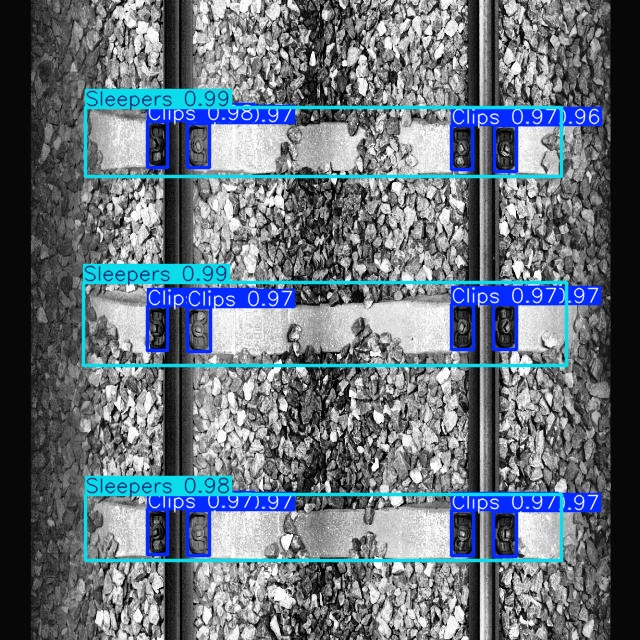


Image: imageyolo31_jpg.rf.8b53d801f624cea1f82eb7c8e58dd03e.jpg
Clips: 8, Sleepers: 2
Correct ratio (4:1): YES


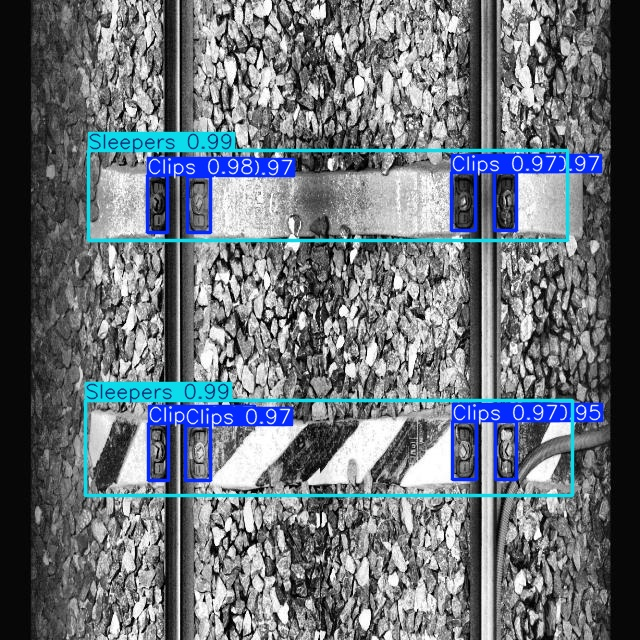


Image: imageyolo50_jpg.rf.82e70bf7d84a96e1451381d80a37dd32.jpg
Clips: 16, Sleepers: 4
Correct ratio (4:1): YES


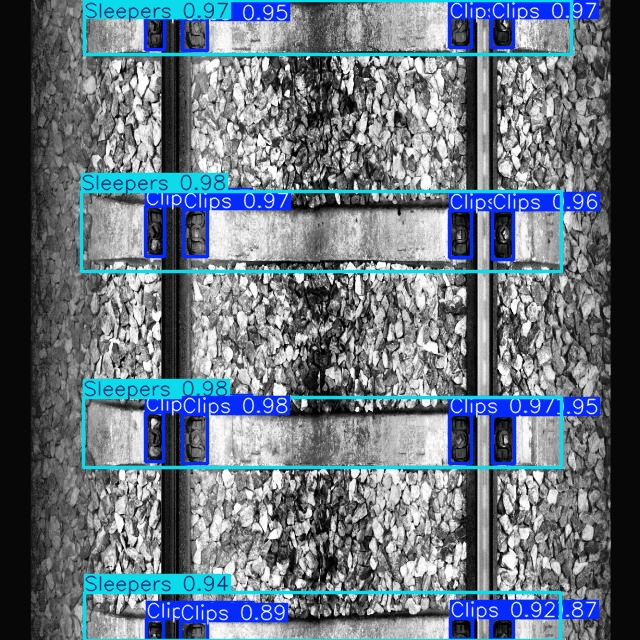


Image: imageyolo52_jpg.rf.36f84b4c7b6f6cfb985f17f50f084ce5.jpg
Clips: 8, Sleepers: 3
Correct ratio (4:1): NO


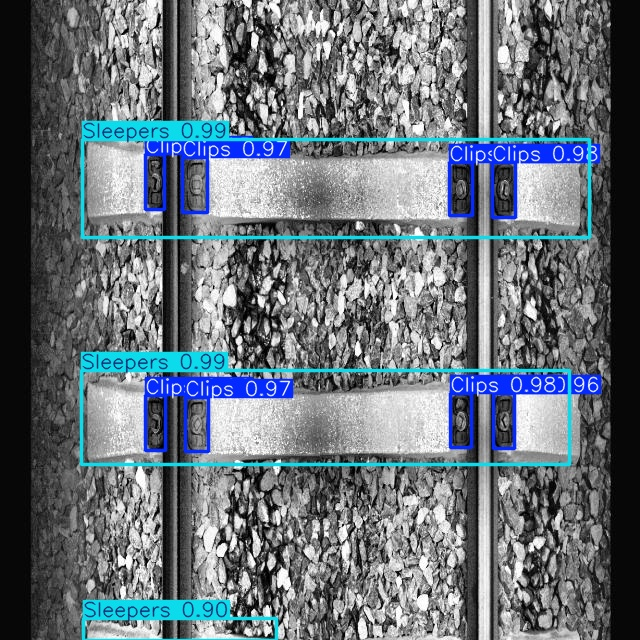


Image: imageyolo48_jpg.rf.e976c09e28e9e60971b2e4e9d1c6a76b.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


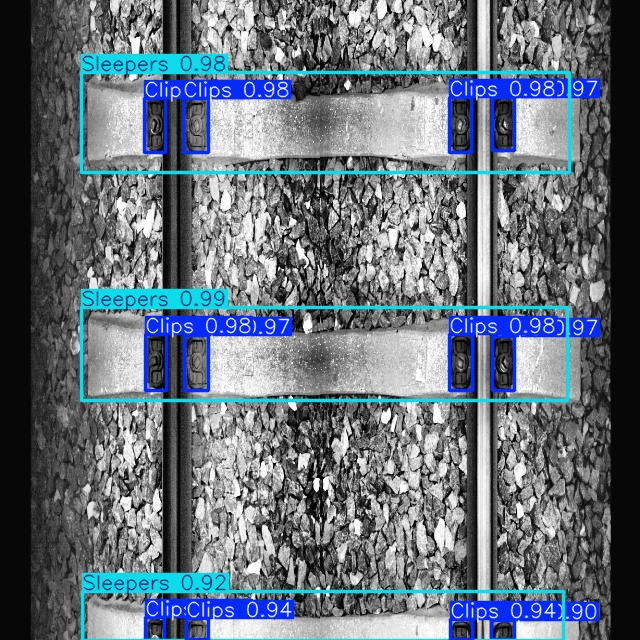


Image: imageyolo7_jpg.rf.cf77e8bb05cbb0dc479747d4d71bdff9.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


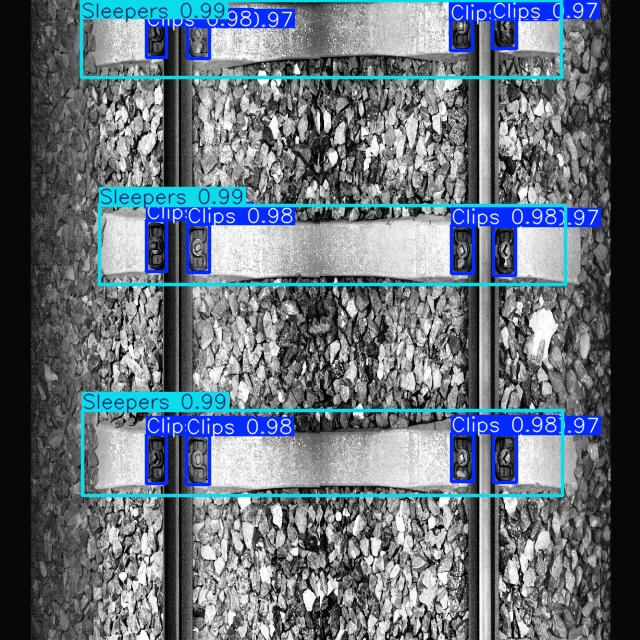


Image: imageyolo10_jpg.rf.5215253977cdfc7e6c0e56de15d7fdb8.jpg
Clips: 16, Sleepers: 4
Correct ratio (4:1): YES


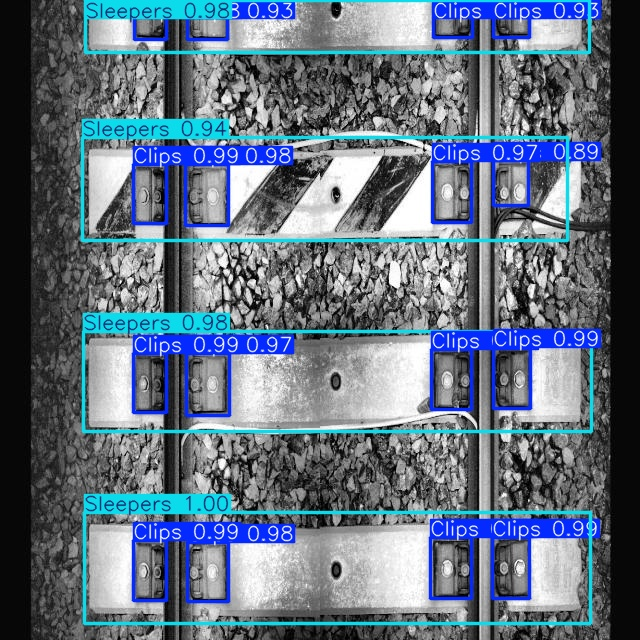


Image: imageyolo49_jpg.rf.406b1e1bc914b74feab89f50cf12dcbd.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


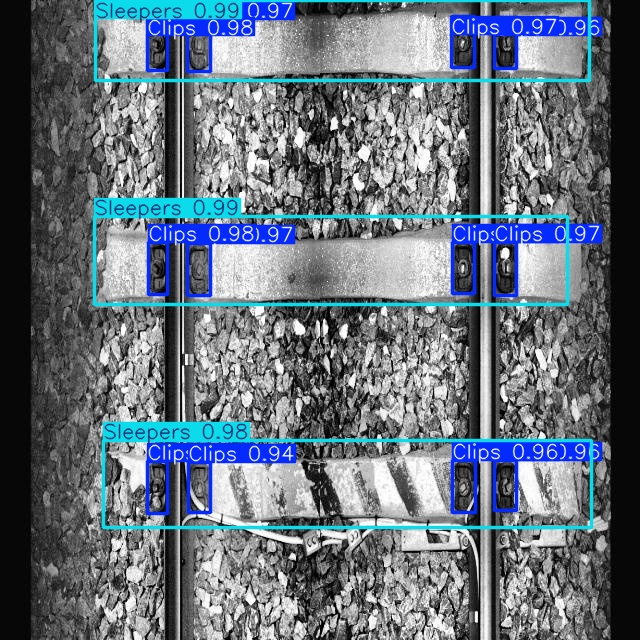


Image: imageyolo39_jpg.rf.3e6f6c4fd15d7d8ff613177e62a95b79.jpg
Clips: 8, Sleepers: 2
Correct ratio (4:1): YES


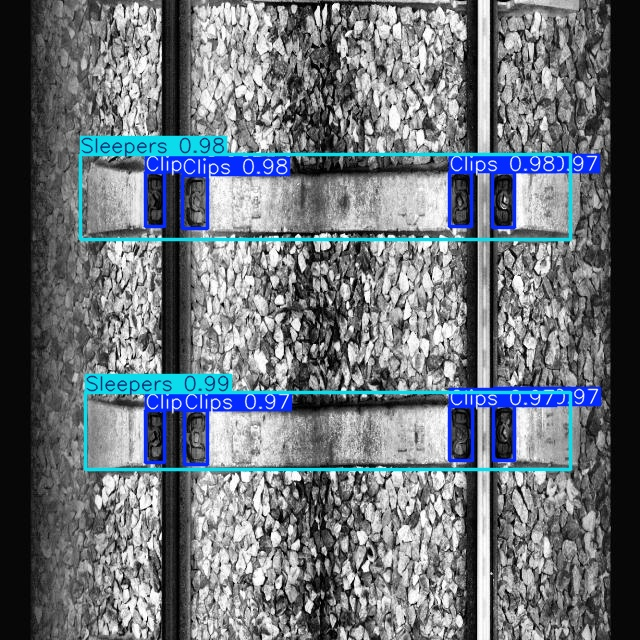


Image: imageyolo60_jpg.rf.d8a2bf7e595c20362d2aaa67daa73ab2.jpg
Clips: 7, Sleepers: 2
Correct ratio (4:1): NO


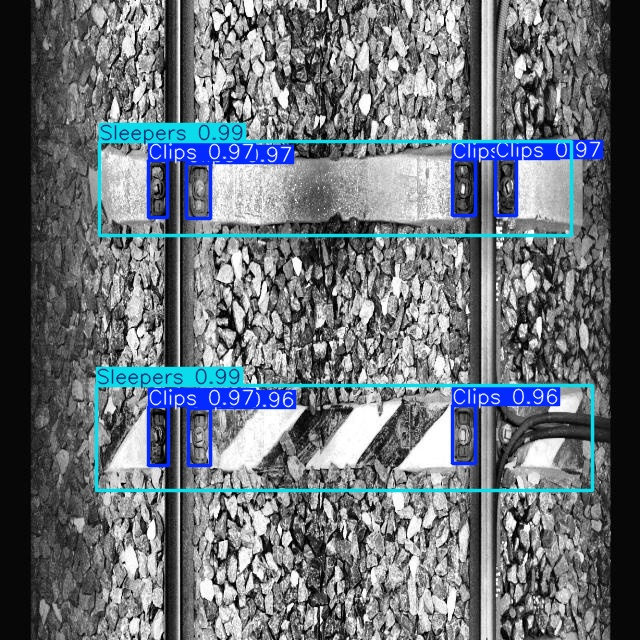


Image: imageyolo58_jpg.rf.8d3404562211b6321c2f2df75cc0af7f.jpg
Clips: 16, Sleepers: 4
Correct ratio (4:1): YES


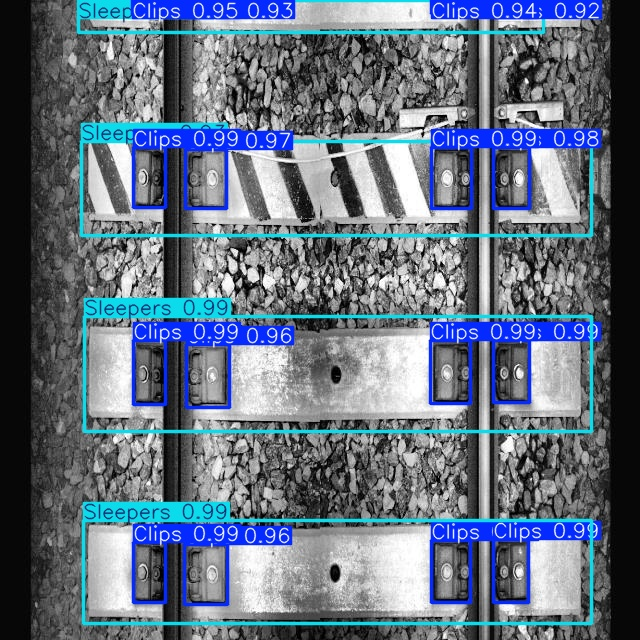


Image: imageyolo12_jpg.rf.d8411af1f678a438d0ee1b126bfdfe92.jpg
Clips: 12, Sleepers: 4
Correct ratio (4:1): NO


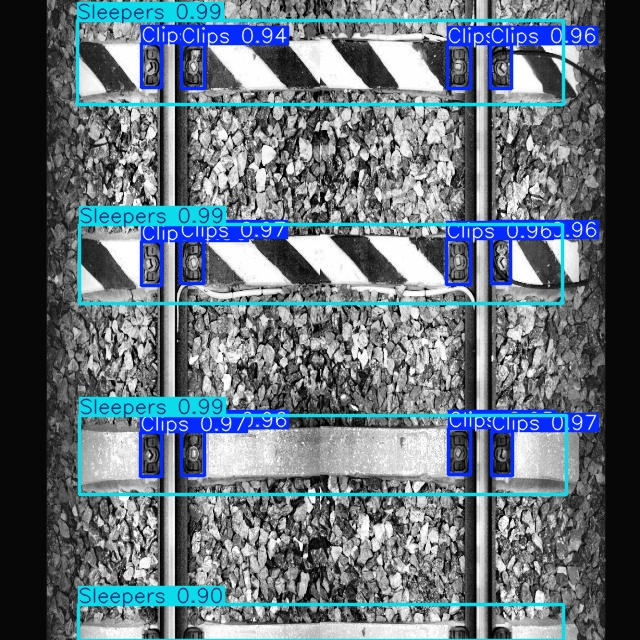


Image: imageyolo35_jpg.rf.960900eec158ce116958b47968b79698.jpg
Clips: 12, Sleepers: 3
Correct ratio (4:1): YES


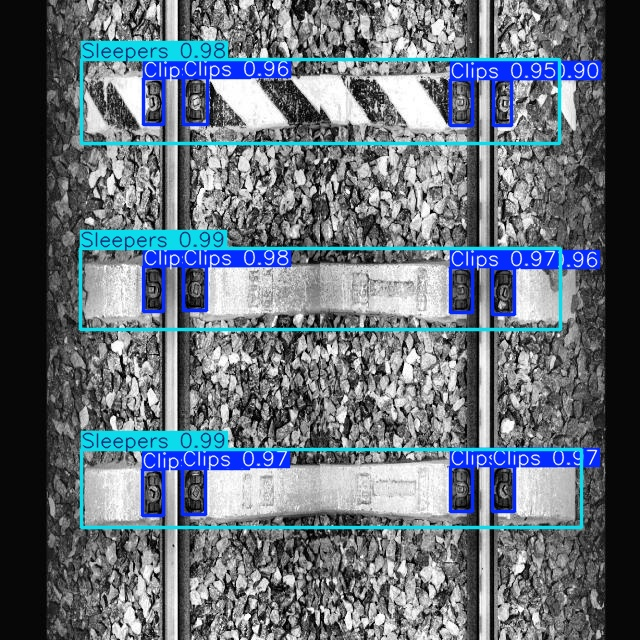


Image: imageyolo47_jpg.rf.a9cc0ef14ec1e741e0d8d11f70768b99.jpg
Clips: 8, Sleepers: 3
Correct ratio (4:1): NO


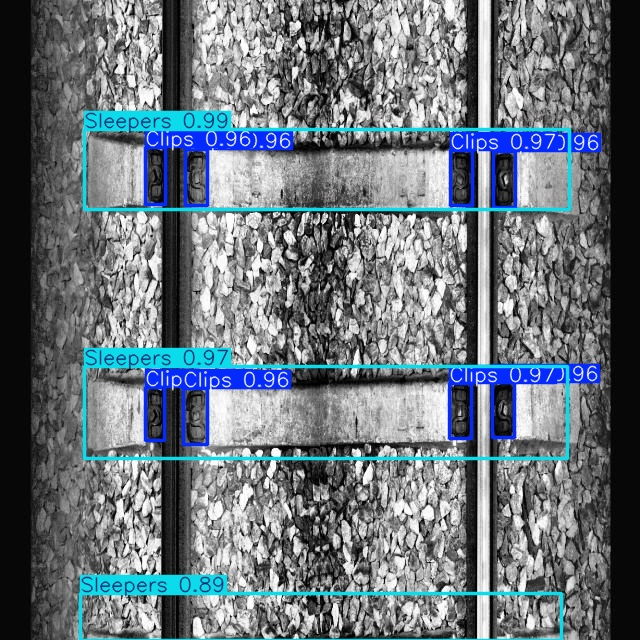

In [ ]:
model = YOLO("/content/runs/detect/sleeper_clip_detector_improved2/weights/best.pt")

# Use both validation and test images
validation_images = glob.glob("Rail-Tracks-6/valid/images/*.jpg")
testing_images = glob.glob("Rail-Tracks-6/test/images/*.jpg")
all_evaluation_images = validation_images + testing_images

if not all_evaluation_images:
    raise FileNotFoundError("No images found.")

detection_results = model.predict(
    source=all_evaluation_images, conf=0.8, iou=0.1, save=True
)

for detection in detection_results:
    # Get counts of each class
    detected_classes = detection.boxes.cls.tolist()
    num_clips = sum(1 for c in detected_classes if c == 0)
    num_sleepers = sum(1 for c in detected_classes if c == 1)

    # Calculate ratio if possible
    clip_to_sleeper_ratio = num_clips / num_sleepers if num_sleepers > 0 else 0

    print(f"\nImage: {os.path.basename(detection.path)}")
    print(f"Clips: {num_clips}, Sleepers: {num_sleepers}")
    print(
        f"Correct ratio (4:1): {'YES' if abs(clip_to_sleeper_ratio - 4) < 0.1 else 'NO'}"
    )

    # Display the image
    output_path = os.path.join(
        str(detection.save_dir), os.path.basename(detection.path)
    )
    display(Image(filename=output_path))


## Results

The model recongizes both sleepers and clips very well and with great confidence.

Since each sleeper is secured by four clips, if the model's predictions are correct, a **4:1 ration** between the two should be observed, which is the case for the vast majority of the pictures.

The only misslabelling can be observed in the following pictures:

- `imageyolo47_jpg.rf.a9cc0ef14ec1e741e0d8d11f70768b99.jpg`: a sleeper can technically be seen at the bottom of the screen but since the images are getting cropped it's not entirely visible; this could techincally be seen as a correct label.
- `imageyolo60_jpg.rf.d8a2bf7e595c20362d2aaa67daa73ab2.jpg`: a clip in the bottom left is not deteccted since it is covered by some pipes.
